#  Intro to Quantum Computing with Qiskit 
### Tutorial 2 + the project: Basics of Quantum Circuits

|||
|-|-|
|**Author:** |Taha Selim|
|**Date:** |April 19th, 2024|
|**Tutrial 2:** |**Version 0** <br/>*Basics of Quantum Circuits*|
|**License:** |MIT License / Taha Selim|
|**Qiskit:** |1.0|
|**Contact:** | t.i.m.m.selim2@hva.nl


In this tutorial, we will learn the basics of quantum circuits. We will start with the basic quantum gates and then move on to more complex circuits. We will also learn how to simulate quantum circuits using Qiskit.

Let's get started!

### **Part 1**

We will start by refreshing our knowledge of programming. After, we will learn how to create classical bits, quantum bits, and gates. 

Let's import `numpy` first. We will need it to do the first few excercises.

In [2]:
# Import numpy 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



First, create a function that initializes a qubit in the state $|0\rangle$. Typically, qubits are created in the ground state. 
You will program this function in the next cell using the following code: 

```python
def initialize_qubit(): 
    ket0 = np.array([[1], [0]])
    return ket0

```

In [3]:
# Run the following code 
def initialize_qubit():
    ket0 = np.array([[1], [0]])
    return ket0

You can run and check your code with the following cell.

In [4]:
# test the function
ket0 = initialize_qubit()
# print the result
print(ket0)

[[1]
 [0]]


Now, let's create a function that initializes a qubit in the state $|1\rangle$.

In [5]:
# Create a function that initializes a qubit to the state |1⟩
def initialize_qubit():
    ket1 = np.array([[0], [1]])
    return ket1

Let's define a function that applies the X gate to a qubit. The X gate is a quantum gate that flips the state of a qubit. It is represented by the following matrix:
$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

In [6]:
# Create a function that applies the X gate to a qubit 
def apply_x_gate(ket):
    X = np.array([[0, 1], [1, 0]])
    return np.dot(X, ket)

Create a function that applies a Hadamard gate to a qubit. The Hadamard gate is a quantum gate that creates superposition. It is represented by the following matrix:

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

In [7]:
# code the function 
def apply_hadamard(ket): 
    hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    return np.dot(hadamard, ket)

Let's test the action of the Hadamard gate on a qubit in the state $|0\rangle$ by executing the following code:

```python
ket0 = initialize_qubit()
ket_Haction = apply_hadamard(ket0)
print(ketH)
```

In [8]:
# test the function
ket0 = initialize_qubit()
ketH = apply_hadamard(ket0)
print(ketH)

[[ 0.70710678]
 [-0.70710678]]


#### Question
What do you think the output? Can you interpret the results? Can you tell us about the quantum state of the qubit after applying the Hadamard gate?

####### you can write your answer here

Often, we need to measure the qubits to extract information from them. Typically, we perform the measurements in a computational basis or on the z-axis. The computational basis is represented by the states $|0\rangle$ and $|1\rangle$. Hence, when we measure, we will get either $|0\rangle$ or $|1\rangle$.

In the next cell, we have a function that measures a qubit. You can run the code to see the results.

```python
def measure_qubit(ket):
    prob0 = np.abs(ket[0])**2
    prob1 = np.abs(ket[1])**2
    result = np.random.choice([0, 1], p=[prob0, prob1])
    return result
```

Notice, that the qubit state is normalized. If not, you need to renormalize the state after the measurement.

In [9]:
# code the function
def measure_qubit(ket):
    prob0 = np.abs(ket[0, 0])**2
    measurement = np.random.choice([0, 1], p=[prob0, 1 - prob0])
    return measurement

You can test the measurements in the next cell by running the following code:

```python
ket0 = initialize_qubit()
ket_Haction = apply_hadamard(ket0)
measurement = measure_qubit(ket_Haction)
print(measurement)
```

In [10]:
# test measurement
ket0 = initialize_qubit()
ket_Haction = apply_hadamard(ket0)
measurement = measure_qubit(ket_Haction)
print(measurement)

1


Note the randomness of the measurement. The measurement is probabilistic, and we can only predict the outcome with a certain probability. To get a feeling for the randomness, you can run the code multiple times. In the next cell, we are going to do so multiple times.

```python
for i in range(10):
    ket0 = initialize_qubit()
    ket_Haction = apply_hadamard(ket0)
    measurement = measure_qubit(ket_Haction)
    print(measurement)
```

In [11]:
# code the function
for i in range(10):
    ket0 = initialize_qubit()
    ket_Haction = apply_hadamard(ket0)
    measurement = measure_qubit(ket_Haction)
    print(measurement)

0
1
1
1
1
0
0
0
0
0


Hopefully, you are seeing the alternation already, but we can also visualize the results. In the next cell, we will plot the results of the measurements. First, we need to import the `matplotlib` library. You can do so by running the following code:

```python
import matplotlib.pyplot as plt
```

Now, you can run the following code to plot the results of the measurements:

```python
results = []
for i in range(1000):
    ket0 = initialize_qubit()
    ket_Haction = apply_hadamard(ket0)
    measurement = measure_qubit(ket_Haction)
    results.append(measurement)

plt.hist(results)
plt.show()
```


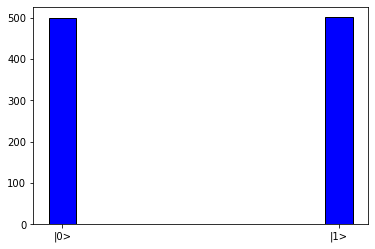

In [12]:
# code the plotting 


results = []
for i in range(1000):
    ket0 = initialize_qubit()
    ket_Haction = apply_hadamard(ket0)
    measurement = measure_qubit(ket_Haction)
    results.append(measurement)
# make a histogram of the results at |0> and |1> as two columns only
plt.hist(results , bins=2, align='mid', rwidth=0.1, color='blue', edgecolor='black')
# set the x-axis ticks to be at the center of the columns
plt.xticks([0.25, 0.75], ['|0>', '|1>'])

# If plt.show() didn't workout, please refer to the command below
fig1=plt.show()


Now, you can test the convergence, by increasing the number of measurements. You can do so by changing the range in the for loop.
**Do you see the convergence to the expected probabilities?**

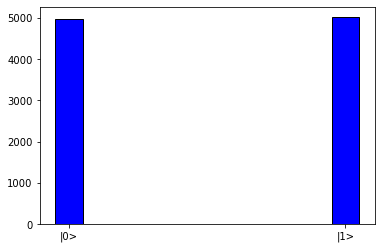

In [13]:
# Change the range of the loop to 10000
results = []
for i in range(10000):
    ket0 = initialize_qubit()
    ket_Haction = apply_hadamard(ket0)
    measurement = measure_qubit(ket_Haction)
    results.append(measurement)
# make a histogram of the results at |0> and |1> as two columns only
plt.hist(results , bins=2, align='mid', rwidth=0.1, color='blue', edgecolor='black')
# set the x-axis ticks to be at the center of the columns
plt.xticks([0.25, 0.75], ['|0>', '|1>'])
plt.show()


Part 1 is done. You can now move on to Part 2.

### **Part 2**
Part 2 is about creating quantum circuits using Qiskit. You can find the instructions in the next cell.

We will learn how to simulate quantum circuits using Qiskit. First, we will install Qiskit using the following code:

```python
!pip install qiskit
```

Check first if Qiskit is already installed in your environment. If not, install it using the code above.

Then, we need to import the necessary libraries. Run the following code:

```python

# Import the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

```

Then, import the necessary Qiskit libraries:

```python
# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
```

In [14]:
# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

Quantum computers are based on quantum bits or qubits. Qubits can be in a superposition of states, which allows quantum computers to perform multiple calculations at the same time. 

To perform computations with quantum computers, we need to translate our problem or algorithm in a quantum circuit. A quantum circuit is defined as a sequence of quantum gates that act on qubits. Quantum circuits typically ends with measurements of the qubits.

Similar to classical computers, quantum computers have classical bits to store the results of the computations. In Qiskit, we can define classical bits using the `ClassicalRegister` class. While quantum bits are defined using the `QuantumRegister` class. Quantum bits are the qubits that we are operating with gates on them. 

Let's create now a simple quantum circuit with one qubit. We will apply the Hadamard gate to the qubit and then measure it using qiskit. We will compare the results from qiskit with the results from our previous code (our model).

```python

To create or initialize a quantum register with qiskit, we use the following code:

```python
# Create a quantum register with 1 qubit
qreg = QuantumRegister(1)
```


In [15]:
# Create a quantum register of 1 qubit
qreg = QuantumRegister(1)

Often, we need to do measurements on the qubits. To do this, we need to create a classical register. We can create a classical register with the following code:

```python
# Create a classical register with 1 bit
creg = ClassicalRegister(1)
```

In [16]:
# create a classical register of 1 bit
creg = ClassicalRegister(1)

In Qiskit, once we have created the quantum and classical registers, we can create a quantum circuit using the following code:

```python
# Create a quantum circuit
qc = QuantumCircuit(qreg, creg)
```

Note that, `qc` denotes the quantum circuit. We can now add gates to the quantum circuit. To add a Hadamard gate to the quantum circuit, we use the following code:

```python
# Add a Hadamard gate to the quantum circuit
qc.h(qreg[0])
```

With the above knowledge, you can now create a quantum circuit that applies the Hadamard gate to a qubit and then measures the qubit. First, we start by creating a quantum circuit with a classical register of 1 classical bit and a quantum register of 1 qubit. 

In [17]:
# Create a quantum circuit with qreg and creg
qc = QuantumCircuit(qreg, creg)

We can also print the circuit using the following code:

```python
# Print the circuit
print(qc)
```

In [20]:
# print the circuit
print(qc)

      
  q0: 
      
c0: 1/
      


If we would like to have the circuit in a graphical form, we can use the following code:

```python
# Draw the circuit
qc.draw()
```

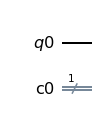

In [19]:
# Draw the circuit
qc.draw(output='mpl')
#display(qc.draw(output='mpl'))

We can now apply a quantum gate like the Hadamard gate to the qubit. We can do this using the following code:

```python
# Apply the Hadamard gate to the qubit
qc.h(q[0])
```

Notice here, qubits are taken as an array. So, if we have more than one qubit, we can access them using the array index.

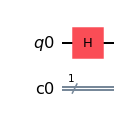

In [20]:
# Apply a Hadamard gate on qubit 0
qc.h(qreg[0])

# Draw the circuit
qc.draw(output='mpl')

Often, we need to measure the qubits. We can do this using the following code:

```python
# Measure the qubit
qc.measure(q, c)
```

Here, it means that we are measuring the qubit and storing the result in the classical register.



In [21]:
# Measure qubit 0
qc.measure(qreg[0], creg[0])

# print the result
print(qc)



      ┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 


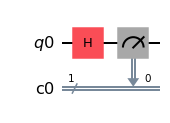

In [22]:
# Draw the circuit
qc.draw(output='mpl')


Qiskit allows us to get the circuit attributes at any time during the construction and the computation. We can retrieve several attributes of the quantum circuit like the number of qubits, the number of classical bits, and the number of gates using the following code:

```python
# Get the number of qubits
print(qc.num_qubits)

# Get the number of classical bits
print(qc.num_clbits)

# Get the number of gates
print(qc.size())
```

In [23]:
# print attributes of the circuit
print(qc.qregs)
print(qc.cregs)
print(qc.data)


[QuantumRegister(1, 'q0')]
[ClassicalRegister(1, 'c0')]
[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q0'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(1, 'q0'), 0),), clbits=(Clbit(ClassicalRegister(1, 'c0'), 0),))]


You can also retrieve the qubit statevector using the following code:

```python
# Import the necessary libraries
from qiskit.quantum_info import partial_trace, Statevector

# Get the qubit statevector
qc.save_statevector()
```


#### Example: 

Construct a quantum circuit of a single qubit and a single classical bit. 

Then, apply the Hadamard gate to the qubit and compare the newely obtained statevector to the statevector of the qubit when it is initialized in the state $|0\rangle$.

We can execute this using the following code example: 

```python
# Get the statevector of the circuit
from qiskit.quantum_info import partial_trace, Statevector


qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(qreg[0])

sv = Statevector(qc)

print(sv)
```

In [24]:
# Get the statevector of the circuit
from qiskit.quantum_info import partial_trace, Statevector

qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

qc.h(qreg[0])

sv = Statevector(qc)
print(sv)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


#### Question 
What do you conclude when seeing the matrix elements of the statevector? 

Does it tell about the superposition? 

######## Write your answer here.

We can represent the effect or the transformation that the action of the Hadamard gate did to the single qubit state. We can do this by plotting the statevector of the qubit before and after the Hadamard gate using bloch spheres.

First, we need to import the necessary libraries: `plot_bloch_multivector` from  `qiskit.visualization`. You can do this by running the following code:

```python
from qiskit.visualization import plot_bloch_multivector
```

Then, we can plot the statevector of the qubit before and after the Hadamard gate using the following code:

```python
# Plot the statevector of the qubit before the Hadamard gate
plot_bloch_multivector(sv)
```

In [25]:
from qiskit.visualization import plot_bloch_multivector

Execute the following cell of code:

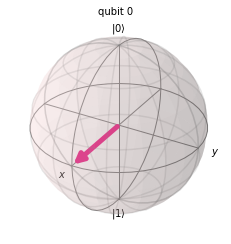

In [26]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

#### Question

Now, let's extend the code a bit. Create the same quantum circuit of one qubit and one classical bit, however this time apply the Hadamard gate twice to the qubit and print the statevector of the qubit. Use the blocksphere to represent the change in the qubit state at each action. Also, compare the statevector to the statevector of the qubit when it is initialized in the state $|0\rangle$.


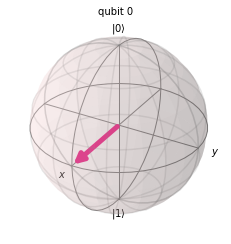

In [27]:
# First, we create the classical and quantum registers: one qubit and one classical bit
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
# Create a quantum circuit with qreg and creg
qc = QuantumCircuit(qreg, creg)

# Apply the first Hadamard gate on qubit 0
qc.h(qreg[0])

# Demonstrate the action of the first Hadamard gate action on the qubit state
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


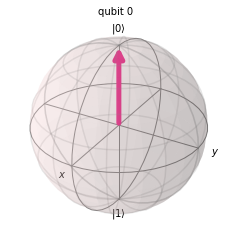

In [28]:
# Apply a second Hadamard gate on qubit 0
qc.h(qreg[0])

# Demonstrate the action of the second Hadamard gate action on the qubit state
state2 = Statevector.from_instruction(qc)
plot_bloch_multivector(state2)

We can perform measurements on the whole qubits or on a specific qubit. 

On a specific qubit, as mentioned before:
```python
# Measure the qubit
qc.measure(q[0], c[0])
```
For measuring all the qubits:
```python
# Measure all the qubits
qc.measure_all()
```

Example, let's construct a quantum circuit with 2 qubits and apply the CNOT gate to the qubits. We will then measure the qubits and compare the results with our model.

```python
# Create a quantum register with 2 qubits
q = QuantumRegister(2)

# Create a classical register with 2 bits
c = ClassicalRegister(2)

# Create a quantum circuit
qc = QuantumCircuit(q, c)

# Apply the CNOT gate to the qubits
qc.cx(q[0], q[1])

# Measure the qubits
qc.measure(q, c)

# Draw the circuit
qc.draw()
```

You can notice that, when we apply the CNOT gate, we need to specify the control qubit and the target qubit. In this case, q[0] is the control qubit and q[1] is the target qubit.

Also, when we perform measurements, we need to specify the qubits to measure. In this case, we are measuring all the qubits. This would mean we get a total measurements of the entire quantum state  of the qubits.

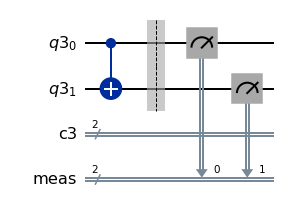

In [29]:
# construct a quantum circuit of two qubits, qreg[0] and qreg[1]
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circuit = QuantumCircuit(qreg, creg)

# apply CNOT gate with qreg[0] as control and qreg[1] as target
circuit.cx(qreg[0], qreg[1])

# measure both qubits
circuit.measure_all()

# draw the circuit
circuit.draw(output='mpl')

Now, let's simulate the quantum circuit using Qiskit. We can do this using the following code:

```python

# Import the necessary libraries

from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator

# To plot the results, import the following library
from qiskit.visualization import plot_histogram

# Create a quantum circuit of one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Apply the Hadamard gate to the qubit
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Simulate the quantum circuit
simulator = BasicSimulator()

# Transpile the quantum circuit
job = sim_backend.run(transpile(qc, simulator), shots=1024)

# Get the result
result = job.result()

# Get the counts
counts = result.get_counts(qc)

# Print the counts
print(counts)
```



In [30]:
# First, import the necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram


{'00 00': 1024}


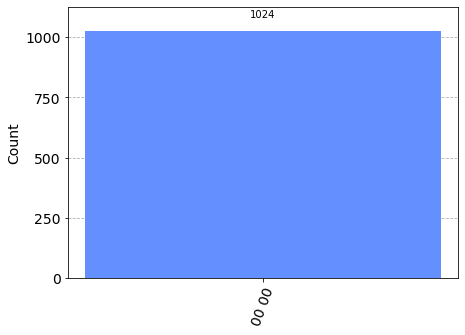

In [31]:
# Try to run the circuit
# Create a quantum circuit of 1 qubit and 1 bit
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

# apply Hadamard gate
qc.h(qreg[0])

# measure the qubit
qc.measure(qreg[0], creg[0])

# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())


#### Question:
Notice, what happens when you run the code. Can you interpret the results? Can you tell us about the quantum state of the qubit after applying the Hadamard gate?

#### Question: 
What is the difference between the quantum circuit with one qubit and the quantum circuit with two qubits? Can you explain the difference in the results?

#### Question:

What happens when you increase the number of shots in the simulation? Can you explain the results?

#### Question

Now, create a quantum circuit of three qubits:

 - What is the size of the Hilbert space?
 - What is the size of the matrix representation of a qubit gate acting on a qubit in the Hilbert space of three qubits?
 - What is the size of the matrix representation of a two-qubit gate acting on two qubits in the Hilbert space of three qubits?
 - What is the size of the state vector of the quantum circuit with three qubits?



Let's do some exercises to test your understanding of quantum circuits:

##### Use the circuit that you created in the previous question with three qubits:

- Apply the Hadamard gate to the first and second qubits simultaneously. 
- Then, apply the CNOT gate to the first and second qubits. Draw the circuit. 
- Finally, measure all the qubits. Simulate the quantum circuit using Qiskit. Can you interpret the results?


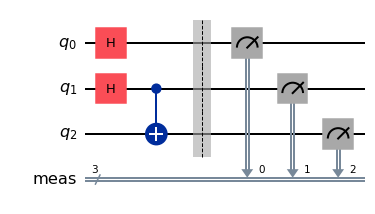

In [32]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()
 
 # Draw the circuit
qc.draw(output='mpl')

{'111': 275, '110': 245, '001': 237, '000': 267}


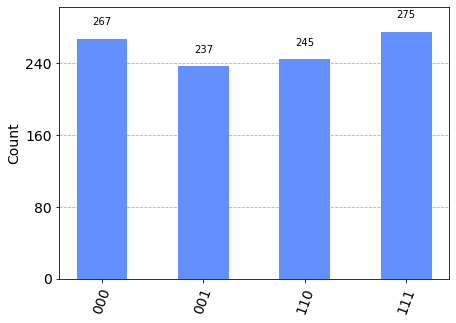

In [33]:
# Simulate the circuit

# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

### Entaglement

Entanglement is a fundamental concept in quantum mechanics. It is a phenomenon where two or more qubits are correlated in such a way that the state of one qubit is coupled with the state of the other qubit. In other words, measuring one qubit will instantly determine the state of the other qubit, regardless of the distance between them. This is a simple definition of entanglement. However, a more precise definition of entanglement will come later in the upcoming tutorials.

We can create entanglement using quantum gates and a minimum of two qubits. The most common gate used to create entanglement is the CNOT gate. The CNOT gate is a two-qubit gate that flips the target qubit if the control qubit is in the state $|1\rangle$. The CNOT gate is also known as the controlled-X gate.

To create entanglement, we can apply the CNOT gate to two qubits. The control qubit will be the first qubit, and the target qubit will be the second qubit. We can then measure the qubits to see if they are entangled.

Let's create a quantum circuit with two qubits, apply a Hadamard gate to the first qubit, and then apply the CNOT gate to the qubits in which the first qubit is the control qubit and the second qubit is the target qubit. Finally, we will measure the qubits and simulate the quantum circuit using Qiskit.

You can use the following code:
```python
# Create a quantum register with 2 qubits
q = QuantumRegister(2)

# Create a classical register with 1 bits
c = ClassicalRegister(1)

# Create a quantum circuit
qc = QuantumCircuit(q, c)

# Apply the Hadamard gate to the first qubit
qc.h(q[0])

# Apply the CNOT gate to the qubits
qc.cx(q[0], q[1])

# Measure the qubit qubit
qc.measureall()

# Draw the circuit
qc.draw()
```



Question: What happens when you run the code? Can you interpret the results? Can you tell us about the quantum state of the qubits after applying the Hadamard gate and the CNOT gate?

Question: Now, apply add X gate to the second qubit and keep applying Hadaamard gate to the first qubit and the CNOT gate to the qubits as in the previous question. Perform the measurements. What do you think the results will be? Can you interpret the results?

For more information, you can use qiskit's documentation.

Circuit construction:
https://docs.quantum.ibm.com/build/circuit-construction

#  Intro to Quantum Computing with Qiskit 
### Tutorial 2: Basics of Quantum Circuits

|||
|-|-|
|**Author:** |Taha Selim|
|**Date:** |April 12th, 2024|
|**Tutrial 2:** |**1.00**<br/>*Basics of Quantum Circuits*|
|**License:** |MIT License / Taha Selim|
|**Qiskit:** |1.0.2|
|**Contact:** | t.i.m.m.selim2@hva.nl

Follow us on Discord channel: https://discord.gg/tY6KqeQY